# DAML  notes
## 3. Preprocessing, PCA, clustering
<hr style="border:2px solid black"> </hr>

## 3.1 Sklearn and a quick note

Sklearn (or Scikit-learn) is a high-level machine learning (ML) library for Python. It integrates with NumPy for arrays, SciPy for optimisation, and Pandas for dataframes (tabular data). It is really, really good and we will use it heavily in this course. It is high level, which lets us spend less time hacking together algorithms ourselves, and more time seeing how they work on data.

Sklearn lets us perform PCA and K-means. "But we haven't got to the ML part of the course. What are they doing a machine learning library?" I hear you say. Well, some people do consider them to be *unsupervised machine learning* techniques, and other people don't. 



Sometimes they form part of a pipeline that eventually involves some ML. For narrative convenience, we will call them **exploratory data analysis** techniques, and leave it as that.

## 3.2 Preprocessing

### 3.2.1 Vectors and matrices

Many data analysis and machine learning techniques require us to represent our data points as vectors of real values, each of the same dimensionality $D$. The elements of these vectors correspond to variables, or **features**. In machine learning it is convention to use *column* vectors, so we will stick to this.

We can refer to some arbitrary data point as $\mathbf{x}\in \mathbb{R}^{D}$ and if we want to refer to specific data points in our dataset of $N$ points we can write $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\mathbf{x}^{(3)},\dots ,\mathbf{x}^{(N)}$ where the ordering isn't important as long as it is consistent. 

\begin{equation}\mathbf{x} =\begin{bmatrix}
x_1\\x_2\\\vdots \\x_{D} \\
\end{bmatrix}
\quad \quad
\mathbf{x}^{(n)} =
\begin{bmatrix}
x_1^{(n)}\\x_2^{(n)}\\ \vdots\\x_{D}^{(n)} \\
\end{bmatrix}\end{equation}




The whole dataset is the collection of these vectors $\{\mathbf{x}^{(n)}\}_{n=1}^{N}$ and can be stored in a dataset matrix $\mathbf{X}$. Annoyingly, it is convention to have the *rows* of this matrix representing different data points so that $\mathbf{X}\in \mathbb{R}^{N\times D}$. I tend to refer to this as a dataset matrix, but it is often referred to as a design matrix in the literature.

\begin{equation}
\mathbf{X} =
\begin{bmatrix}
\mathbf{x}^{(1)^\top}\\
\mathbf{x}^{(2)^\top}\\
\mathbf{x}^{(3)^\top}\\
\vdots \\
\mathbf{x}^{(N)^\top}\\
\end{bmatrix}
=
\begin{bmatrix}
x_1^{(1)}&x_2^{(1)}&\dots& x_{D}^{(1)} \\
x_1^{(2)}&x_2^{(2)}&\dots& x_{D}^{(2)} \\
x_1^{(3)}&x_2^{(3)}&\dots& x_{D}^{(3)} \\
\dots&\dots&\ddots& \vdots \\
x_1^{(N)}&x_2^{(N)}&\dots& x_{D}^{(N)} \\
\end{bmatrix}
\end{equation}

Given some tabular data, we need to convert it into this $\mathbf{X}$ format. If the features in our table are all continuous variables then this is very straightforward. In fact, with a table represented as a pandas dataframe it only requires a single line of code.

> **Note that in "machine learning" speak we typically refer to variables as features.**

Let's look at the iris dataset from the lecture. We will start by having it as a dataframe and then convert it into a dataset matrix.

In [1]:
# Get loader for the iris dataset and import pandas and numpy
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Convert into dataframe with the columns as the feature names
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


To convert this into $\mathbf{X}\in \mathbb{R}^{N\times D}$ we just have to run a line of code.

In [10]:
# Convert dataframe into array
X = df.values

# Check the shape of X
print(f"X has shape {X.shape}")
print(X[:5,:])

X has shape (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### 3.2.2 Standardisation

Standardising your data is **extremely important for PCA, K-means and many machine learning algorithms.** It allows features to be compared on a like-for-like basis so that those with naturally large measurements don't dominate.

For some of the toy examples in the lectures and notebooks where I have generated synthetic data, I haven't bothered with standardisation. There are two reasons for this:

1. It becomes more fiddly to make the kind of data I want to use to illustrate a point
2. The features in these synthetic datasets are all at similar scales and things still works (they are  *roughly* standardised)

**This will rarely be the case with real data! When in doubt, standardise your data, seriously! :)**

To do this, for each feature we compute the mean and standard deviation (SD) of the measurements across all data points. For each measurement of that feature, we subtract the mean and divide by the SD.

\begin{equation}
\mathbf{X}_{new} =
\begin{bmatrix}
\frac{x_1^{(1)}-\mu_1}{\sigma_1}&\frac{x_2^{(1)}-\mu_2}{\sigma_2}&\dots& \frac{x_{D}^{(1)}-\mu_{D}}{\sigma_{D}} \\
\frac{x_1^{(2)}-\mu_1}{\sigma_1}&\frac{x_2^{(2)}-\mu_2}{\sigma_2}&\dots& \frac{x_{D}^{(2)}-\mu_{D}}{\sigma_{D}} \\ \\
\dots&\dots&\ddots& \vdots \\
\frac{x_1^{({N})}-\mu_1}{\sigma_1}&\frac{x_2^{({N})}-\mu_2}{\sigma_2}&\dots& \frac{x_{D}^{({N})}-\mu_{D}}{\sigma_{D}}\\\\
\end{bmatrix}
\end{equation}

where $\mu_j = \frac{1}{N}\sum_{n} \mathbf{x}^{(n)}_j$ and $\sigma_j^2 = \frac{1}{N}\sum_{n}(\mathbf{x}^{(n)}_j-\mu_j)^2$.

We can do this very easily in sklearn using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) class.

In [3]:
# Make a copy of our dataset to compare stats after
X_old = np.array(df)

# Import scaler
from sklearn.preprocessing import StandardScaler

# Make a scaler object
scaler = StandardScaler()

# Fit the scaler to the dataset. This means computing the means and STDs
scaler.fit(X)

# Finally apply the scaler to transform the data
X = scaler.transform(X)


# Compare stats
print(
    f"Before standardisation feature means were {np.round(X_old.mean(0),2)} and SDs were {np.round(X_old.std(0),2)}"
)
print(
    f"After standardisation feature means are {np.round(X.mean(0),2)} and SDs are {np.round(X.std(0),2)}"
)

Before standardisation feature means were [5.84 3.06 3.76 1.2 ] and SDs were [0.83 0.43 1.76 0.76]
After standardisation feature means are [-0. -0. -0. -0.] and SDs are [1. 1. 1. 1.]


## 3.3 Principal Component Analysis (PCA)

PCA takes a **standardised** dataset matrix $\mathbf{X}\in \mathbb{R}^{N\times D} $ and returns an orthonormal matrix $\mathbf{W}_{PC}\in \mathbb{R}^{D\times D}$. Note that orthonormal just means that $\mathbf{W}_{PC}^\top \mathbf{W}_{PC} = \mathbf{I}$.

The columns of $\mathbf{W}_{PC}$, which we will denote as $\mathbf{w}_1, \mathbf{w}_2, \dots,\mathbf{w}_D$ are the eigenvectors of the empirical covariance matrix $\mathbf{\Sigma }= \frac{1}{N}\mathbf{X^\top}\mathbf{X}$ sorted from highest to lowest eigenvalue $\lambda_1 , \lambda_2, \dots , \lambda_D$. These eigenvectors are known as the **principal components** of the data.

We are interested in PCA for the purpose of *dimensionality reduction*. We often have a dataset that is too high dimensional to visualise. We would like a simple linear transform $\mathbf{Z=XW}$ that turns our high dimensional data points $\{\mathbf{x}^{(n)}\}_{n=1}^{N}$\(the rows of $\mathbf{X}$) into low dimensional data points $\{\mathbf{z}^{(n)}\}_{n=1}^{N}$ (the rows of $\mathbf{Z}$). Here, $\mathbf{x}\in\mathbb{R}^D$ and $\mathbf{z}\in \mathbb{R}^d$ where $d<D$.

In order to quantify how good this transform is, we create a setup where its transpose can be used to (attempt to) reverse the transformation. This means we can compute $\mathbf{\hat{X}}=\mathbf{ZW^\top}=\mathbf{X}\mathbf{W}\mathbf{W}^\top$ where the rows of $\mathbf{\hat{X}}$ are reconstructions of the original data points $\{\hat{\mathbf{x}}^{(n)}\}_{n=1}^{N}$.

We can now assess how good a transformation $\mathbf{W}$ is by computing the average (squared) distance between points and their reconstructions.

\begin{equation}
\frac{1}{N}\sum_{n} \lVert{\mathbf{x}^{(n)}-\mathbf{\hat{x}}^{(n)}}\rVert^2=\frac{1}{N}\sum_{n} \lVert{\mathbf{x}^{(n)}-\mathbf{W}^\top \mathbf{W}\mathbf{x}^{(n)}}\rVert^2
\end{equation}

We can write this as an optimisation problem (we'll be seeing a lot more of these later in the course). We want to solve

\begin{equation}
\underset{\mathbf{W}}{\mathrm{minimise}}\,\, \, \frac{1}{N}\sum_{n} \lVert{\mathbf{x}^{(n)}-\mathbf{W}^\top \mathbf{W}\mathbf{x}^{(n)}}\rVert^2
\end{equation}

It looks a bit weird at first that I've basically written out the same thing again with a few small differences but it is making it explicit that we have an expression that we want to minimise and that we explicitly want to find $\mathbf{W}$ that minimises it (as opposed to $\mathbf{X}$ which is fixed for a particular dataset).

As it happens, we actually want to solve the constrained optimisation problem:

\begin{equation}\underset{\mathbf{W}}{\mathrm{minimise}}\,\, \, \frac{1}{N}\sum_{n} \lVert{\mathbf{x}^{(n)}-\mathbf{W}^\top \mathbf{W}\mathbf{x}^{(n)}}\rVert^2 \, \, \, \text{subject to} \, \, \, \mathbf{W}^\top \mathbf{W} = \mathbf{I}\end{equation}

You can see why this constraint is necessarily if you follow the proof (optional) in Murphy 20.1.2 but at a high-level it is good because it means the new low dimensional features $z_1, z_2 ,\dots, z_d$ are uncorrelated so they describe different *aspects* of the data. 

What has this got to do with PCA? Well, the solution to this optimisation problem when projecting down to $d$ dimensions is the matrix whose $d$ columns are the first $d$ principal components of the data.

\begin{equation}\mathbf{W} = \begin{bmatrix}\mathbf{w}_1&\mathbf{w}_2&\dots &\mathbf{w}_d\end{bmatrix}\end{equation}

Let's visit the ellipse example in the lecture to see PCA in action.

Text(0.5, 0, '$x_3$')

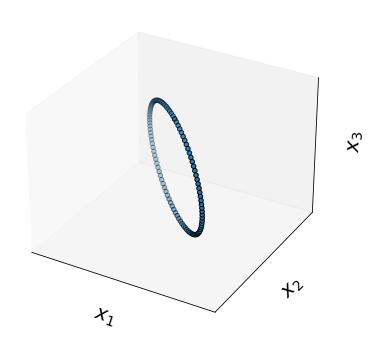

In [4]:
# Import preprocessing from sklearn so we can standardise in one go using X= preprocessing.scale(X)
# Also import matplotlib for plotting
from sklearn import preprocessing
import matplotlib.pyplot as plt

# This makes matplotlib output nice figures without much tweaking
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "savefig.dpi": 300,  # Higher res output
        "savefig.format": "pdf",  # PDF outputs
        "savefig.bbox": "tight",  # remove whitespace around figure
        "savefig.transparent": True,  # transparent background
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

# Generate points on an unrotated ellipse
a = 10
b = 1
theta = np.linspace(0,2*np.pi,100)

y = a*np.sin(theta)
z = b*np.cos(theta)
x = np.zeros(100)

# Stack into dataset matrix
X = np.vstack((x,y,z)).T

# Rotate 
t = np.pi / 4
R = np.array([[np.cos(t), np.sin(t),0],[-np.sin(t), np.cos(t),0],[0,0,1]])
X = X @ R

# Standardise in a single line. This is an alternative to what we did in the last cell
X = preprocessing.scale(X)

# Finally, plot
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(projection='3d')
ax.grid()
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.scatter(X[:,0],X[:,1],X[:,2],edgecolor='k')
ax.set_xlabel('$x_1$', size=20)
ax.set_ylabel('$x_2$', size=20)
ax.set_zlabel('$x_3$', size=20)


Here, we have a dataset of points that maps out an ellipse in 3D. We know that ellipses are only 2D so we would hope that if we projected this dataset down to 2D we would get something that looks an awful lot like an ellipse.

Let's use the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class from sklearn to compute $\mathbf{W}$ and then $\mathbf{Z}=\mathbf{XW}$. When creating an object from this class, it takes in an argument `n_components`. This refers to the number of principal components we want to keep. In this example, we want to go down to 2D so we need to keep 2 principal components.

Text(0, 0.5, '$z_2$')

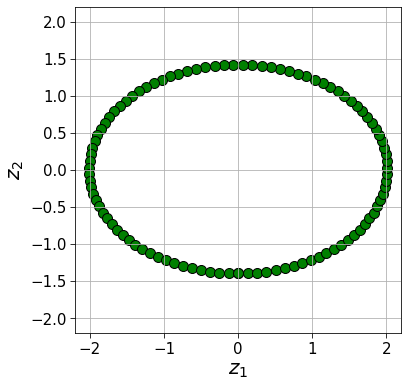

In [5]:
# Import PCA package
from sklearn.decomposition import PCA

# Create a pca object
pca = PCA(n_components=2)

# Calling pca.fit(X) computes W behind the scenes
pca.fit(X)

# Calling pca.transform(X) then computes X@W
Z = pca.transform(X)

# Let's now plot our transformed dataset to see if it makes sense

# Plot Y
fig, ax = plt.subplots(figsize=[6,6])
ax.set_aspect("equal", "box")
ax.grid()
ax.set_xlim([-2.2, 2.2])
ax.set_ylim([-2.2, 2.2])
ax.scatter(Z[:, 0], Z[:, 1],color='g',edgecolor='k')
ax.set_xlabel("$z_1$", size=20)
ax.set_ylabel("$z_2$", size=20)


Great! It's an ellipse! In addition to giving you a transformation that minimises reconstruction error, the principal components (i.e. the features in the transformed space) correspond to (orthogonal) directions of maximum variance. This is why $z_1$ above is the major axis of the ellipse, and $z_2$ is the minor axis as these are the axes from which points are furthest away (on average).

We can quantify how much of the variance has been captured in these dimensions by considering the ratio of the eigenvalues corresponding to the principal components we've used relative to the sum of all eigenvalues of $\boldsymbol\Sigma$. Sklearn computes these automatically:

In [6]:
# The amount of variance captured in the 1st and 2nd principal component
# It captures all of the variance because the third dimension is redundant in describing a 2D shape
pca.explained_variance_ratio_

array([0.66666667, 0.33333333])

## 3.4 K-means

K-means is a clustering algorithm that assigns each point to one of $K$ clusters. It should take in a **standardised** dataset, otherwise the distance computations will be skewed by naturally large features.

The algorithm is straightforward:

- A user decides how many clusters they want
- Cluster centres $\{\mathbf{c}_{k}\}_{k=1}^{K}$ are created at random 
- We then alternate between assigning points to their nearest clusters, and updating the clusters as the centre of their assigned points until there is no change

However, if you look at the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class in sklearn you can see that there are several other arguments it can take in, other than just `n_clusters`. This is because the algorithms as presented to you in lectures are usually in their most elementary form. In practice there are lots of ways to tweak an algorithm to make it more efficient, faster or more appropriate for a specific scenario or dataset, but I digress.

Let's perform K-means on some synthetic data for illustration. First we will use sklearn to make a 2D dataset that consists of 4 blobs.


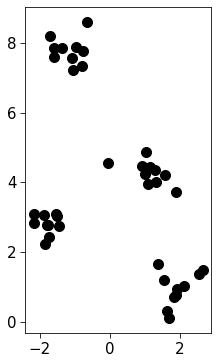

In [7]:
# Sklearn lets us make synthetic datasets
from sklearn.datasets import make_blobs

# Let's make a dataset of 2D points split into 4 blobs
X, _ = make_blobs(
    n_samples=40, centers=4, n_features=2, random_state=0, cluster_std=0.4
)

fig, ax = plt.subplots(figsize=[6, 6])
ax.set_aspect("equal", "box")
ax.scatter(X[:, 0], X[:, 1], color="k")

Let's run K-Means with 4 clusters on this data, and plot the clusters in 4 different colours.

[0 1 1 2 3 3 2 2 3 0 2 0 0 3 1 1 2 1 0 1 1 1 1 1 2 0 0 0 3 0 3 2 3 3 3 2 0
 2 3 2]


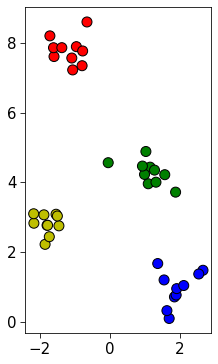

In [8]:
# Import k-means class
from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(n_clusters=4, random_state=0)

# Run the k-means algorithm
kmeans.fit(X)

# We can look at kmeans.labels_ to see the assignments
print(kmeans.labels_)

# Make a colourmap
colormap = np.array(["r", "g", "b", "y"])


fig, ax = plt.subplots(figsize=[6, 6])
ax.set_aspect("equal", "box")
ax.scatter(X[:, 0], X[:, 1], c=colormap[kmeans.labels_], edgecolor="k")

Nice! Although this algorithm is very sensible to the intial cluster placement. Also, clusters don't necessarily correspond to anything meaningful. I am personally not the biggest fan of clustering :)  

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-24